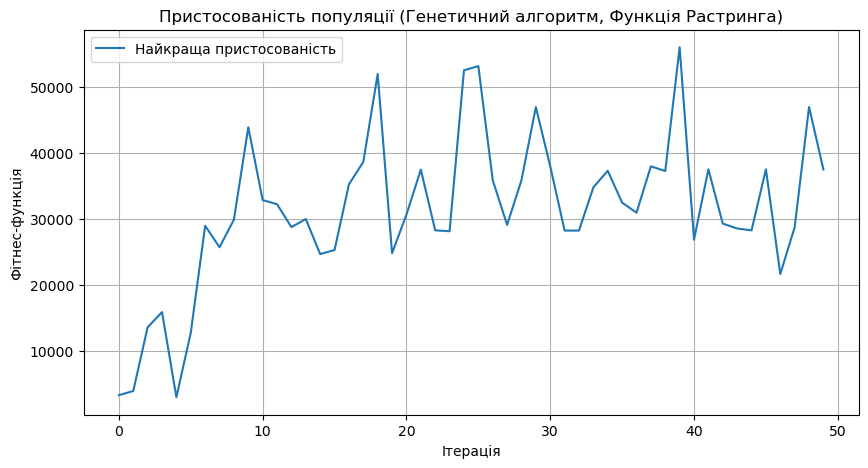

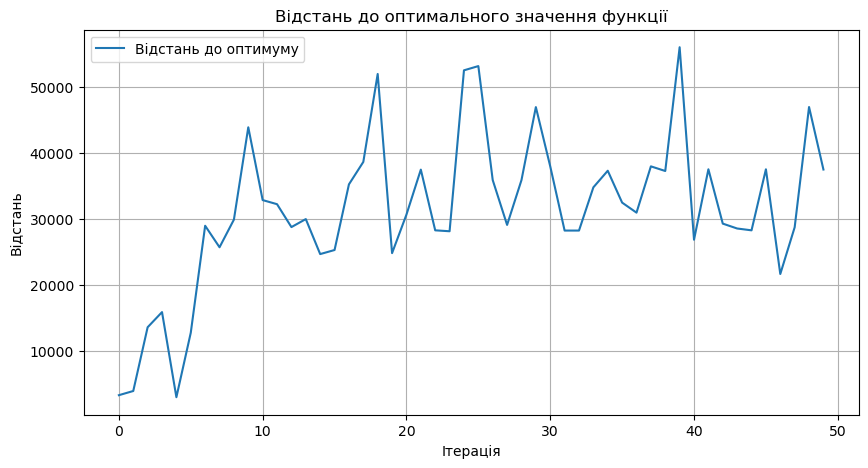

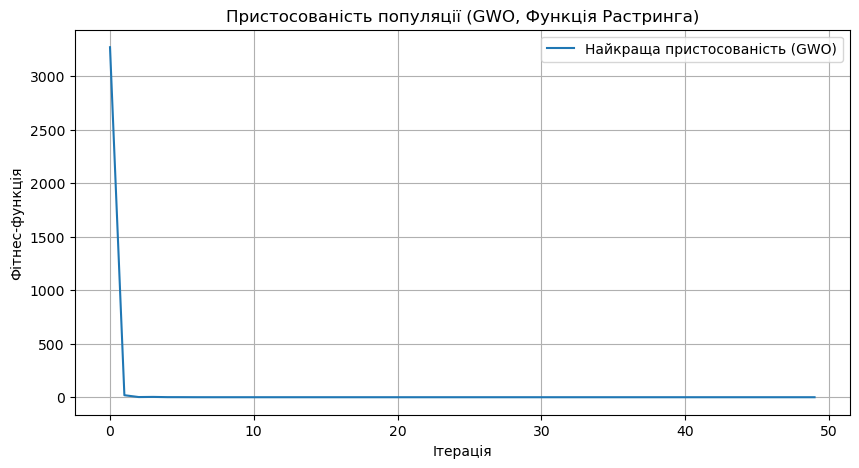

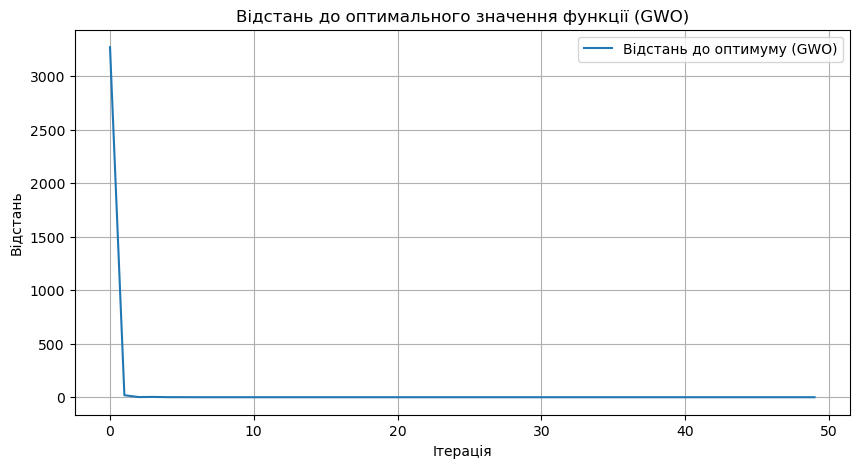

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Функція Растринга

def rastrigin(X):
    n = len(X)
    return 10 * n + sum([(x**2 - 10 * np.cos(2 * np.pi * x)) for x in X])

# Штрафна функція для врахування обмежень
def penalty_function(x, y):
    penalty = 0
    # Обмеження: x + y <= 1
    if x + y > 1:
        penalty += 1000 * (x + y - 1)
    # Обмеження: x^2 + y^2 <= 0.5
    if x**2 + y**2 > 0.5:
        penalty += 1000 * (x**2 + y**2 - 0.5)
    return penalty

class GeneticSolver:
    def __init__(self, bounds, genome_size, population_count, generations=100, mutation_rate=0.01, crossover_rate=0.7, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.genome_size = genome_size
        self.population_count = population_count
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.population = self.create_initial_population()

    def create_initial_population(self):
        return [''.join(np.random.choice(['0', '1'], self.genome_size)) for _ in range(self.population_count)]

    def decode_genome(self, genome):
        half = self.genome_size // 2
        value_x = int(genome[:half], 2)
        value_y = int(genome[half:], 2)

        x = self.low + (value_x / (2**half - 1)) * (self.high - self.low)
        y = self.low + (value_y / (2**half - 1)) * (self.high - self.low)
        return x, y

    def calculate_fitness(self, x, y):
        return rastrigin([x, y]) + penalty_function(x, y)

    def select_parents(self):
        fitness = np.array([self.calculate_fitness(*self.decode_genome(gen)) for gen in self.population])
        fitness -= fitness.min()  # Зсув, щоб мінімум був 0
        fitness += 1e-6           # Додаємо мале число для уникнення нулів
        probabilities = fitness / fitness.sum()
        parents = np.random.choice(self.population, size=self.population_count, p=probabilities)
        return parents

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.genome_size - 1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
            return child1, child2
        return parent1, parent2

    def mutate(self, genome):
        genome = list(genome)
        for i in range(len(genome)):
            if np.random.rand() < self.mutation_rate:
                genome[i] = '1' if genome[i] == '0' else '0'
        return ''.join(genome)

    def evolve(self):
        best_fitness = []
        distances_to_optimum = []
        for generation in range(self.generations):
            parents = self.select_parents()
            next_generation = []
            for i in range(0, len(parents), 2):
                parent1, parent2 = parents[i], parents[i+1]
                child1, child2 = self.crossover(parent1, parent2)
                next_generation.append(self.mutate(child1))
                next_generation.append(self.mutate(child2))
            self.population = next_generation[:self.population_count]
            decoded = [self.decode_genome(gen) for gen in self.population]
            fitness_values = [rastrigin(pos) + penalty_function(*pos) for pos in decoded]

            best_fitness.append(np.min(fitness_values))
            distances_to_optimum.append(np.min(fitness_values))

        # Графік пристосованості
        plt.figure(figsize=(10, 5))
        plt.plot(best_fitness, label='Найкраща пристосованість')
        plt.xlabel('Ітерація')
        plt.ylabel('Фітнес-функція')
        plt.title('Пристосованість популяції (Генетичний алгоритм, Функція Растринга)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Графік відстані до оптимуму
        plt.figure(figsize=(10, 5))
        plt.plot(distances_to_optimum, label='Відстань до оптимуму')
        plt.xlabel('Ітерація')
        plt.ylabel('Відстань')
        plt.title('Відстань до оптимального значення функції')
        plt.legend()
        plt.grid(True)
        plt.show()

class GreyWolfOptimizer:
    def __init__(self, bounds, wolves_count, generations=100, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.wolves_count = wolves_count
        self.generations = generations
        self.positions = np.random.uniform(self.low, self.high, (wolves_count, 2))

    def fitness_function(self, x, y):
        return rastrigin([x, y]) + penalty_function(x, y)

    def optimize(self):
        best_fitness = []
        distances_to_optimum = []
        for gen in range(self.generations):
            fitness = np.array([self.fitness_function(pos[0], pos[1]) for pos in self.positions])
            alpha = self.positions[np.argmin(fitness)]
            best_fitness.append(np.min(fitness))
            distances_to_optimum.append(np.min(fitness))
            a = 2 - gen * (2 / self.generations)
            for i in range(self.wolves_count):
                A = 2 * a * np.random.rand(2) - a
                C = 2 * np.random.rand(2)
                D_alpha = np.abs(C * alpha - self.positions[i])
                self.positions[i] = np.clip(alpha - A * D_alpha, self.low, self.high)

        plt.figure(figsize=(10, 5))
        plt.plot(best_fitness, label='Найкраща пристосованість (GWO)')
        plt.xlabel('Ітерація')
        plt.ylabel('Фітнес-функція')
        plt.title('Пристосованість популяції (GWO, Функція Растринга)')
        plt.legend()
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(distances_to_optimum, label='Відстань до оптимуму (GWO)')
        plt.xlabel('Ітерація')
        plt.ylabel('Відстань')
        plt.title('Відстань до оптимального значення функції (GWO)')
        plt.legend()
        plt.grid(True)
        plt.show()

bounds = (-5.12, 5.12)
solver = GeneticSolver(bounds, 18, 40, 50, 0.01, 0.7)
solver.evolve()
gwo_solver = GreyWolfOptimizer(bounds, 30, 50)
gwo_solver.optimize()

**Висновки**:
1. Обмеження введені через штрафні функції, що ефективно забезпечила врахування обмежень, змусивши обидва алгоритми уникати непридатних рішень.
2. GA виявився більш чутливим до штрафів, що зумовило нестабільність та повільний процес оптимізації.
3. GWO показав вищу стійкість і швидкість адаптації до обмежень, але може мати обмежену точність через ранню стабілізацію.